In [1]:
print('Connect to google drive')
from google.colab import drive
drive.mount('/gdrive')

Connect to google drive
Mounted at /gdrive


In [2]:
print('Import necessary libraries')

import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
import glob
import pickle

import warnings
warnings.filterwarnings("ignore")

import random
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import gc
import tqdm

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import neighbors
import joblib



Import necessary libraries


In [3]:
base_path='/gdrive/My Drive/Colab Notebooks/'
weights_path='/gdrive/My Drive/Colab Notebooks/weights/'

In [4]:
def euclidean_distance(x_true,y_true, x_pred, y_pred):
    return np.mean(((x_true-x_pred)**2+(y_true-y_pred)**2)**0.5)    

In [5]:
version='forPdata423_halfgrid'


In [6]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/data423.csv.zip') #
data.shape

(14373, 316)

In [7]:
data.head()

,rsid1,rsid2,rsid3,rsid4,rsid5,rsid6,rsid7,rsid8,rsid9,rsid10,...,rsid307,rsid308,rsid309,rsid310,rsid311,rsid312,x,y,timestamp,path
0,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934464983,record_2021_10_11_07_41_02
1,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934467125,record_2021_10_11_07_41_02
2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934469251,record_2021_10_11_07_41_02
3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934471370,record_2021_10_11_07_41_02
4,-78,-999,-999,-95,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,40.85,25.74,1633934473508,record_2021_10_11_07_41_02


In [8]:
uniquePoints=data.loc[data.loc[:,['x','y']].duplicated()==False,['x','y']]
print('we have a target grid of',uniquePoints.shape[0],'unique points')

we have a target grid of 87 unique points


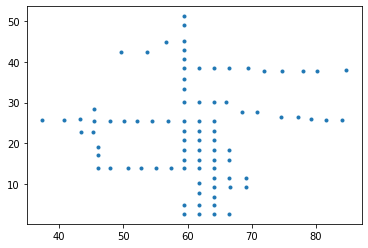

In [9]:
import matplotlib.pyplot as plt
plt.plot(uniquePoints.x.values,uniquePoints.y.values,'.')
plt.show()

In [10]:
uniquePoints.x.values[0]#,uniquePoints.y[0], uniquePoints.x[1],uniquePoints.y[1]

43.26

In [11]:
euclidean_distance(uniquePoints.x.values[0],uniquePoints.y.values[0], uniquePoints.x.values[1],uniquePoints.y.values[1])

2.4146635376383156

In [12]:
distances=[]
for row in range(uniquePoints.shape[0]):
    other=[x for x in range(uniquePoints.shape[0]) if x not in [row]]
    row_distances=[]
    for row2 in other:
        row_distances.append(euclidean_distance(uniquePoints.x.values[row],uniquePoints.y.values[row], uniquePoints.x.values[row2],uniquePoints.y.values[row2]))

    distances.append(row_distances)

In [13]:
distances=np.stack(distances)
distances.shape

(87, 86)

In [14]:
np.min(distances,1)

array([2.20476756, 2.41466354, 3.49      , 2.48      , 2.07395757,
       2.07395757, 2.56      , 2.33      , 2.33      , 2.33      ,
       2.32      , 2.32      , 2.32      , 2.32      , 2.09      ,
       2.32      , 2.32      , 2.25      , 2.25      , 2.17      ,
       2.09      , 2.09      , 2.33      , 2.4       , 2.4       ,
       2.33      , 2.48      , 2.79      , 2.53810953, 2.53810953,
       2.32      , 2.32      , 2.33      , 1.78      , 2.09      ,
       2.32      , 2.33      , 2.33      , 2.3354871 , 2.33      ,
       2.25      , 2.25      , 1.86      , 2.32      , 2.25      ,
       1.86      , 2.32      , 2.32      , 2.33      , 2.33      ,
       2.20476756, 3.03      , 2.32      , 2.32      , 2.32      ,
       1.94      , 1.94      , 2.32      , 2.09      , 2.09      ,
       1.86      , 1.86      , 2.02      , 2.02      , 1.78      ,
       2.09      , 2.09      , 2.09      , 2.09      , 2.33      ,
       2.18      , 2.18      , 1.78      , 2.33      , 2.32   

In [15]:
np.min(distances,1).shape

(87,)

In [16]:
print('we original have a target grid of',np.min(distances,1).mean(),'mean distance')

we original have a target grid of 2.3217444553836546 mean distance


In [17]:
print('assign a number to each point in a plot')

assign a number to each point in a plot


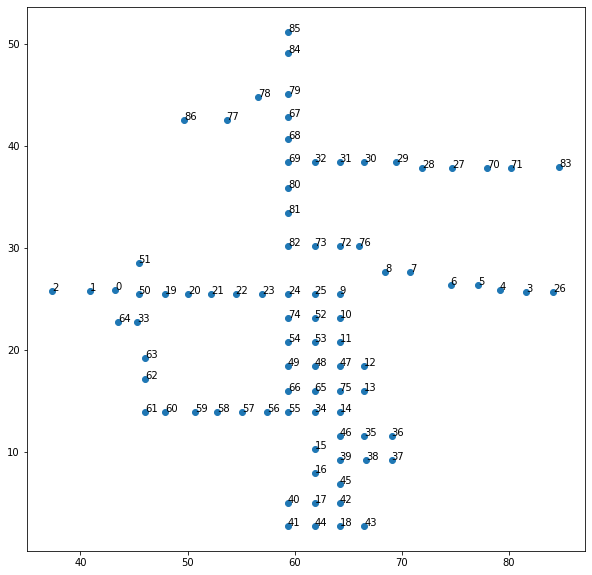

In [18]:
# fig, ax = plt.scatter(z, y)

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i], y[i]))

plt.figure(figsize=(10,10))    
plt.scatter(uniquePoints.x.values, uniquePoints.y.values)

# for i, txt in enumerate(n):
for i in range(len(uniquePoints)):
    
    plt.annotate(str(i), (uniquePoints.x.values[i], uniquePoints.y.values[i]))

In [19]:
print('from plot mannualy set to sets of poits to make plot more thin')

from plot mannualy set to sets of poits to make plot more thin


In [20]:
set1=[85,79,77,68,32,30,28,70,83,80,82,72,8,6,4,26,23,25,21,19,51,33,0,2,62,60,58,56,74,10,53,49,47,65,13,34,46,36,38,15,45,17,41,18]
set2=[84,78,86,67,69,31,29,27,71,81,73,76,7,5,3,24,9,22,20,50,64,1,63,61,59,57,55,52,54,11,48,12,66,75,14,35,37,39,16,40,42,44,43]

In [21]:
len(set1),len(set2),len(np.unique(set1)),len(np.unique(set2))

(44, 43, 44, 43)

In [22]:
len(np.unique(set1+set2))

87

In [23]:
[x for x in range(len(uniquePoints)) if x not in np.unique(set1+set2)]

[]

In [24]:
# uniquePoints.iloc[77],uniquePoints.iloc[86]

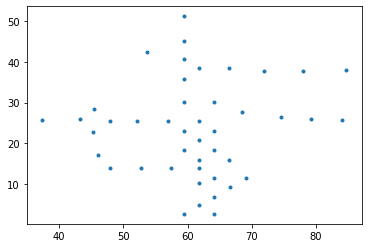

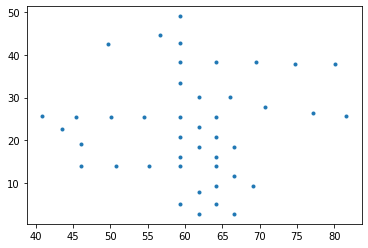

In [25]:
plt.plot(uniquePoints.iloc[set1,:].x.values,uniquePoints.iloc[set1,:].y.values,'.')
plt.show()
plt.plot(uniquePoints.iloc[set2,:].x.values,uniquePoints.iloc[set2,:].y.values,'.')
plt.show()

In [26]:
uniquePoints1=uniquePoints.iloc[set1,:]
distances1=[]
for row in range(uniquePoints1.shape[0]):
    other=[x for x in range(uniquePoints1.shape[0]) if x not in [row]]
    row_distances=[]
    for row2 in other:
        row_distances.append(euclidean_distance(uniquePoints1.x.values[row],uniquePoints1.y.values[row], uniquePoints1.x.values[row2],uniquePoints1.y.values[row2]))

    distances1.append(row_distances)
distances1=np.stack(distances1)
distances1.shape    

(44, 43)

In [27]:
print('we original have a target grid of',np.min(distances1,1).mean(),'mean distance')

we original have a target grid of 3.9805898581647 mean distance


In [28]:
uniquePoints2=uniquePoints.iloc[set2,:]
distances2=[]
for row in range(uniquePoints2.shape[0]):
    other=[x for x in range(uniquePoints2.shape[0]) if x not in [row]]
    row_distances=[]
    for row2 in other:
        row_distances.append(euclidean_distance(uniquePoints2.x.values[row],uniquePoints2.y.values[row], uniquePoints2.x.values[row2],uniquePoints2.y.values[row2]))

    distances2.append(row_distances)
distances2=np.stack(distances2)
distances2.shape    

(43, 42)

In [29]:
print('we original have a target grid of',np.min(distances2,1).mean(),'mean distance')

we original have a target grid of 3.8483770449690136 mean distance


In [30]:
print('we original have a target grid of',(np.min(distances1,1).mean()+np.min(distances2,1).mean())/2,'mean distance')

we original have a target grid of 3.9144834515668565 mean distance


In [31]:
uniquePoints['pointNum']=np.arange(len(uniquePoints))
uniquePoints['setNum']=1
uniquePoints.setNum.iloc[set2]=2
uniquePoints.head()

,x,y,pointNum,setNum
0,43.26,25.89,0,1
4,40.85,25.74,1,2
7,37.36,25.74,2,1
14,81.63,25.66,3,2
18,79.15,25.89,4,1


In [32]:
data=data.merge(uniquePoints,left_on=['x','y'],right_on=['x','y'])

In [33]:
data.head()

,rsid1,rsid2,rsid3,rsid4,rsid5,rsid6,rsid7,rsid8,rsid9,rsid10,...,rsid309,rsid310,rsid311,rsid312,x,y,timestamp,path,pointNum,setNum
0,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,43.26,25.89,1633934464983,record_2021_10_11_07_41_02,0,1
1,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,43.26,25.89,1633934467125,record_2021_10_11_07_41_02,0,1
2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,43.26,25.89,1633934469251,record_2021_10_11_07_41_02,0,1
3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,43.26,25.89,1633934471370,record_2021_10_11_07_41_02,0,1
4,-86,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,43.26,25.89,1633934490489,record_2021_10_11_07_41_02,0,1


In [34]:
# data.head()

In [35]:
TRAIN_FEATS=[x for x in data.columns if x not in ['x', 'y', 'path', 'timestamp', 'pointNum', 'setNum']]
len(TRAIN_FEATS)

312

In [36]:
dataA=data.copy()

In [37]:
data=dataA.loc[data.setNum==1,:]
data.shape

(7004, 318)

In [38]:
unpaths=data.path.unique()

In [39]:
print('we have ',len(unpaths),' unique paths')

we have  423  unique paths


### CV TRAIN

In [40]:
# CROSS VALIDATION

name='KNeighbors'+version

split_score=[]
for split in [1,2]:
    data=dataA.loc[dataA.setNum==split,:]
    data.shape
    unpaths=data.path.unique()
    print('we have ',len(unpaths),' unique paths')

    score_df = pd.DataFrame()
    oof = list()
    predictions = list()

    oof_x, oof_y = np.zeros(data.shape[0]), np.zeros(data.shape[0])
    preds_x, preds_y = 0, 0

    scores_per_fold=[]

    all_preds=[]
    all_targets=[]

    np.random.seed(42)
    sh=np.random.permutation(unpaths)



    k=5
    val_size=int(len(sh)/k)
    for f in range(k):
        print('fold:', f)

        if f<(k-1):
            val_paths=sh[val_size*f:val_size*(f+1)]
        else:
            val_paths=sh[val_size*f:]

        train_paths=[x for x in unpaths if x not in val_paths]
        
        val_paths=np.array(val_paths)
        train_paths=np.array(train_paths)
        
        X_train = data.loc[data.path.isin(train_paths), TRAIN_FEATS ].reset_index(drop=True)

        y_trainXY =  data.loc[data.path.isin(train_paths), ['x', 'y'] ].reset_index(drop=True).values

        X_val = data.loc[data.path.isin(val_paths), TRAIN_FEATS ].reset_index(drop=True)
        y_valXY = data.loc[data.path.isin(val_paths), ['x', 'y'] ].reset_index(drop=True).values


        knn = neighbors.KNeighborsRegressor(45, weights='distance')
        val_predsXY = knn.fit(X_train, y_trainXY).predict(X_val)

        print(euclidean_distance(val_predsXY[:,0], val_predsXY[:,1], y_valXY[:,0], y_valXY[:,1]))

        all_preds.append(val_predsXY)
        all_targets.append(y_valXY)
            

    all_predsV=np.vstack(all_preds)
    all_targetsV=np.vstack(all_targets)    

    print('mean validation error, 5-fold', euclidean_distance(all_targetsV[:,0], all_targetsV[:,1], all_predsV[:,0], all_predsV[:,1]))
    split_score.append(euclidean_distance(all_targetsV[:,0], all_targetsV[:,1], all_predsV[:,0], all_predsV[:,1]))
print('average splits score', np.mean(split_score))    

we have  423  unique paths
fold: 0
2.473897347704318
fold: 1
2.2412316981729385
fold: 2
2.307676867206438
fold: 3
2.3341186788257198
fold: 4
2.321748005502759
mean validation error, 5-fold 2.338599885439442
we have  423  unique paths
fold: 0
2.375438900553801
fold: 1
2.581709176309792
fold: 2
2.3593181029675367
fold: 3
2.332807960449787
fold: 4
2.374897669334114
mean validation error, 5-fold 2.4067891004209443
average splits score 2.372694492930193


In [41]:
name, version

('KNeighborsforPdata423_halfgrid', 'forPdata423_halfgrid')

In [42]:
pd.DataFrame(all_predsV,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/'+name+'_oof2.csv.gz', index=False, compression='gzip')
# pd.DataFrame(all_targetsV,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/all_targetsV2.csv.gz', index=False, compression='gzip')

In [43]:
# pd.DataFrame(all_predsV,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/KNeighbors_'+version+'.csv.gz', index=False, compression='gzip')
# pd.DataFrame(all_targetsV,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/all_targetsV_'+version+'.csv.gz', index=False, compression='gzip')

In [44]:
# CROSS VALIDATION

# name='lgbm'+version


split_score=[]
split_score_othersplit=[]
for split in [1,2]:
    data=dataA.loc[dataA.setNum==split,:]
    data_other_split = dataA.loc[dataA.setNum==(3-split),:]
    unpaths_other_split=data_other_split.path.unique()
    data.shape
    unpaths=data.path.unique()
    print('we have ',len(unpaths),' unique paths')
    score_df = pd.DataFrame()
    oof = list()
    predictions = list()

    oof_x, oof_y = np.zeros(data.shape[0]), np.zeros(data.shape[0])
    preds_x, preds_y = 0, 0

    oof_x_othersplit, oof_y_othersplit = np.zeros(data_other_split.shape[0]), np.zeros(data_other_split.shape[0])
    preds_x_othersplit, preds_y_othersplit = 0, 0

    scores_per_fold=[]

    all_preds=[]
    all_targets=[]
    all_preds_othersplit=[]
    all_targets_othersplit=[]

    np.random.seed(42)
    sh=np.random.permutation(unpaths)


    k=5
    val_size=int(len(sh)/k)
    for f in range(k):
        print('fold:', f)

        if f<(k-1):
            val_paths=sh[val_size*f:val_size*(f+1)]
        else:
            val_paths=sh[val_size*f:]

        train_paths=[x for x in unpaths if x not in val_paths]
        
        val_paths=np.array(val_paths)
        train_paths=np.array(train_paths)
        
        X_train = data.loc[data.path.isin(train_paths), TRAIN_FEATS ].reset_index(drop=True)

        y_trainXY =  data.loc[data.path.isin(train_paths), ['x', 'y'] ].reset_index(drop=True).values

        X_val = data.loc[data.path.isin(val_paths), TRAIN_FEATS ].reset_index(drop=True)
        y_valXY = data.loc[data.path.isin(val_paths), ['x', 'y'] ].reset_index(drop=True).values

        # val_paths = np.concatenate((val_paths,unpaths_other_split))
        # X_val = dataA.loc[dataA.path.isin(val_paths), TRAIN_FEATS ].reset_index(drop=True)
        # y_valXY = dataA.loc[dataA.path.isin(val_paths), ['x', 'y'] ].reset_index(drop=True).values
        
        X_val_othersplit = data_other_split.loc[:, TRAIN_FEATS ].reset_index(drop=True)
        y_valXY_othersplit = data_other_split.loc[:, ['x', 'y'] ].reset_index(drop=True).values


        val_predsXY=[]
        val_predsXY_othersplit=[]
        

        knn = neighbors.KNeighborsRegressor(45, weights='distance')
        val_predsXY = knn.fit(X_train, y_trainXY).predict(X_val)
        val_predsXY_othersplit = knn.predict(X_val_othersplit)

        
        print(euclidean_distance(val_predsXY[:,0], val_predsXY[:,1], y_valXY[:,0], y_valXY[:,1]))
        print(euclidean_distance(val_predsXY_othersplit[:,0], val_predsXY_othersplit[:,1], y_valXY_othersplit[:,0], y_valXY_othersplit[:,1]))

        all_preds.append(val_predsXY)
        all_preds_othersplit.append(val_predsXY_othersplit)
        all_targets.append(y_valXY)
        all_targets_othersplit.append(y_valXY_othersplit)
            

    all_predsV=np.vstack(all_preds)
    all_targetsV=np.vstack(all_targets)    

    all_predsV_othersplit=np.vstack(all_preds_othersplit)
    all_targetsV_othersplit=np.vstack(all_targets_othersplit)    

    print('mean validation error, 5-fold', euclidean_distance(all_targetsV[:,0], all_targetsV[:,1], all_predsV[:,0], all_predsV[:,1]))
    split_score.append(euclidean_distance(all_targetsV[:,0], all_targetsV[:,1], all_predsV[:,0], all_predsV[:,1]))
    print('mean validation error othersplit, 5-fold', euclidean_distance(all_targetsV_othersplit[:,0], all_targetsV_othersplit[:,1], all_predsV_othersplit[:,0], all_predsV_othersplit[:,1]))
    split_score_othersplit.append(euclidean_distance(all_targetsV_othersplit[:,0], all_targetsV_othersplit[:,1], all_predsV_othersplit[:,0], all_predsV_othersplit[:,1]))
print('average splits score', np.mean(split_score))       
print('average splits othersplit score', np.mean(split_score_othersplit))       

we have  423  unique paths
fold: 0
2.473897347704318
2.608781076512231
fold: 1
2.2412316981729385
2.581875081619754
fold: 2
2.307676867206438
2.604777750766176
fold: 3
2.3341186788257198
2.599994385248322
fold: 4
2.321748005502759
2.589976783951564
mean validation error, 5-fold 2.338599885439442
mean validation error othersplit, 5-fold 2.59708101561961
we have  423  unique paths
fold: 0
2.375438900553801
2.519925188390712
fold: 1
2.581709176309792
2.555637455142859
fold: 2
2.3593181029675367
2.535146301251935
fold: 3
2.332807960449787
2.5146868870340104
fold: 4
2.374897669334114
2.536332173834584
mean validation error, 5-fold 2.4067891004209443
mean validation error othersplit, 5-fold 2.53234560113082
average splits score 2.372694492930193
average splits othersplit score 2.564713308375215


In [ ]:
( np.mean(split_score)+np.mean(split_score_othersplit))/2
# 2.468703900652704

2.468703900652704

In [45]:
pd.DataFrame(all_predsV_othersplit,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/'+name+'_othersplit_oof2.csv.gz', index=False, compression='gzip')
# pd.DataFrame(all_targetsV_othersplit,columns=['x', 'y']).to_csv('/gdrive/My Drive/Colab Notebooks/all_targetsV2_othersplit.csv.gz', index=False, compression='gzip')

## EVALUATION - PLOTS

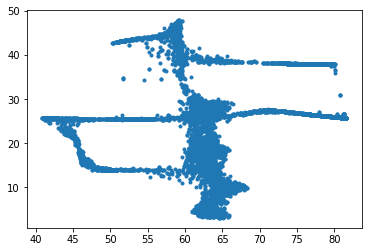

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_predsV[:,0],all_predsV[:,1],'.')
plt.show()

**5 FOLD CV PREDICTIONS OVER TARGET GRID**  
With blue dots are the true checkpoints  
Orange dots for predictions

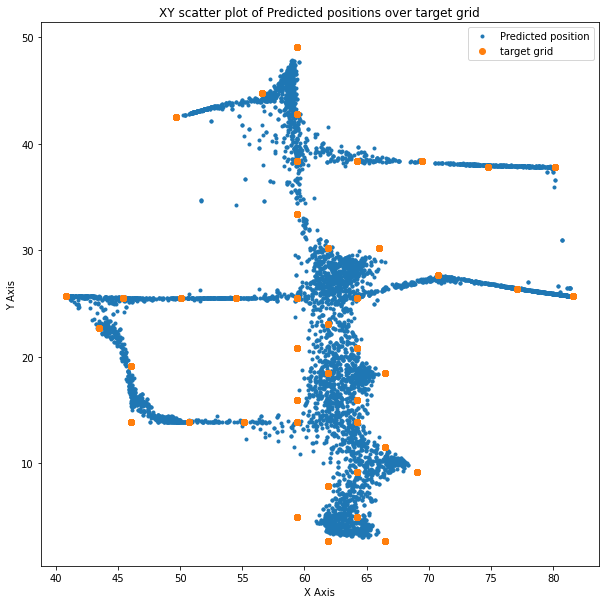

mean validation error, 5-fold 2.4067891004209443


In [ ]:
plt.figure(figsize=(10,10))
plt.title('XY scatter plot of Predicted positions over target grid')
plt.plot(all_predsV[:,0],all_predsV[:,1],'.', label='Predicted position')
plt.plot(all_targetsV[:,0],all_targetsV[:,1],'o', label='target grid')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()
print('mean validation error, 5-fold', euclidean_distance(all_targetsV[:,0], all_targetsV[:,1], all_predsV[:,0], all_predsV[:,1]))

## Full train

In [ ]:


# name=version+'KNeighbors'



# train_paths=unpaths[:]

# train_paths=np.array(train_paths)

# X_train = data.loc[data.path.isin(train_paths), TRAIN_FEATS ].reset_index(drop=True)

# y_trainXY =  data.loc[data.path.isin(train_paths), ['x', 'y'] ].reset_index(drop=True).values
# knn = neighbors.KNeighborsRegressor(45, weights='distance')
# knn_model=knn.fit(X_train, y_trainXY)
# train_predsXY = knn_model.predict(X_train)

# print('train error',euclidean_distance(train_predsXY[:,0], train_predsXY[:,1], y_trainXY[:,0], y_trainXY[:,1]))


In [ ]:
# print('Save Knn model fully trained')
# joblib.dump(knn_model,'/gdrive/My Drive/Colab Notebooks/weights/'+name+'_model')